In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Anchor Blocked Data Analysis

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/anblock-error-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,material,encoded_material,err_an1,err_an2
0,-0.121986,0.154828,156.541672,11.274605,127.833336,12.449890,237.800003,10.444801,5.027886,203.649994,10.187698,5.032578,cardboard,1,-0.174615,-0.169924
1,-0.121986,0.154828,112.437500,11.271500,146.750000,12.394920,225.649994,10.291893,5.027886,141.625000,10.959061,5.032578,cardboard,1,-0.174615,-0.169924
2,-0.121986,0.154828,144.785721,10.847305,113.821426,12.288635,235.050003,10.175896,5.074803,244.187500,10.943405,5.046653,cardboard,1,-0.127698,-0.155849
3,-0.093835,0.154828,114.000000,11.452705,122.642860,12.261917,179.916672,10.845024,5.037270,155.208328,10.949112,5.046653,cardboard,1,-0.165232,-0.155849
4,-0.089144,0.215821,148.428574,11.258995,114.357140,12.589401,199.791672,10.216927,5.037270,171.500000,10.924698,5.037270,cardboard,1,-0.165232,-0.165232


In [5]:
# split to subsets
cardboard_df = df[df['material'] == 'cardboard']
foam_df = df[df['material'] == 'foam']
metal_df = df[df['material'] == 'metal']
plastic_df = df[df['material'] == 'plastic']
wooden_cabinet_df = df[df['material'] == 'wooden-cabinet']
wooden_shelf_df = df[df['material'] == 'wooden-shelf']

In [6]:
datasets = [cardboard_df, foam_df, metal_df, plastic_df, wooden_cabinet_df, wooden_shelf_df]

# Names or labels for each dataset
dataset_names = ['Cardboard', 'Foam', 'Metal', 'Plastic', 'Wooden Cabinet', 'Wooden Shelf']

In [12]:
def comparison_plot(col_name, metric):
    # Create subplots for each dataset
    fig, axs = plt.subplots(2, 3, figsize=(10, 5))  # 1 rows, 6 columns

    # Flatten the 3x2 array of subplots to simplify indexing
    axs = axs.flatten()

    # Iterate through each dataset and plot the histogram in individual subplots using Seaborn
    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        sns.histplot(data=dataset, x=col_name, bins=30, ax=axs[i], kde=True, edgecolor='white')
        axs[i].set_title(name)
        axs[i].set_xlabel('')  # Remove overall x-label   # Remove x-axis labels
        axs[i].set_ylabel('')

        # Calculate mean and plot a vertical line at the mean value
        mean_value = dataset[col_name].mean()
        axs[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        axs[i].legend()  # Show the mean value in the legend

    # Hide inner x-axis labels and ticks
    # for ax in axs.flat:
    #    ax.label_outer()

    # Add a single x-label at the bottom center
    fig.text(0.5, 0.004, f"{col_name}{metric}", ha='center', va='center')
    fig.text(0.003, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

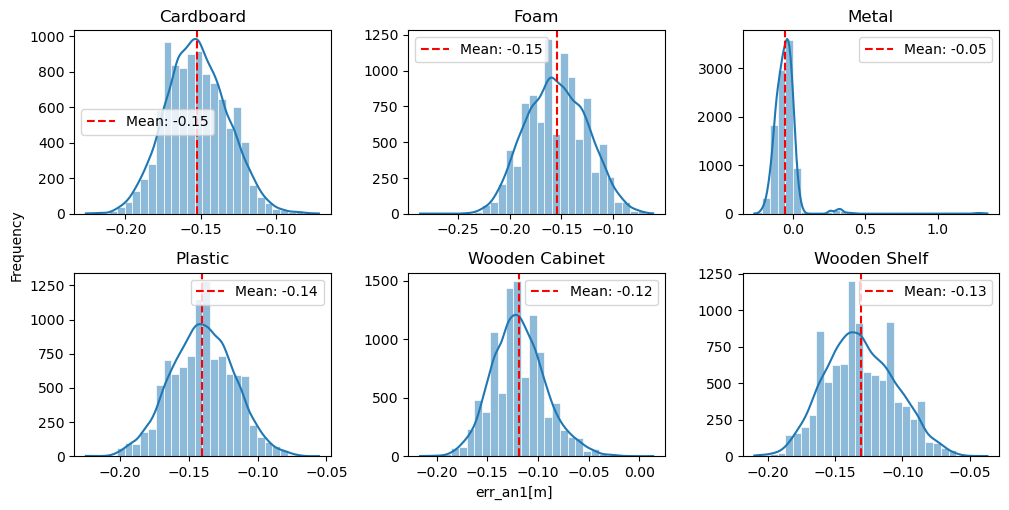

In [13]:
comparison_plot(col_name='err_an1', metric='[m]')

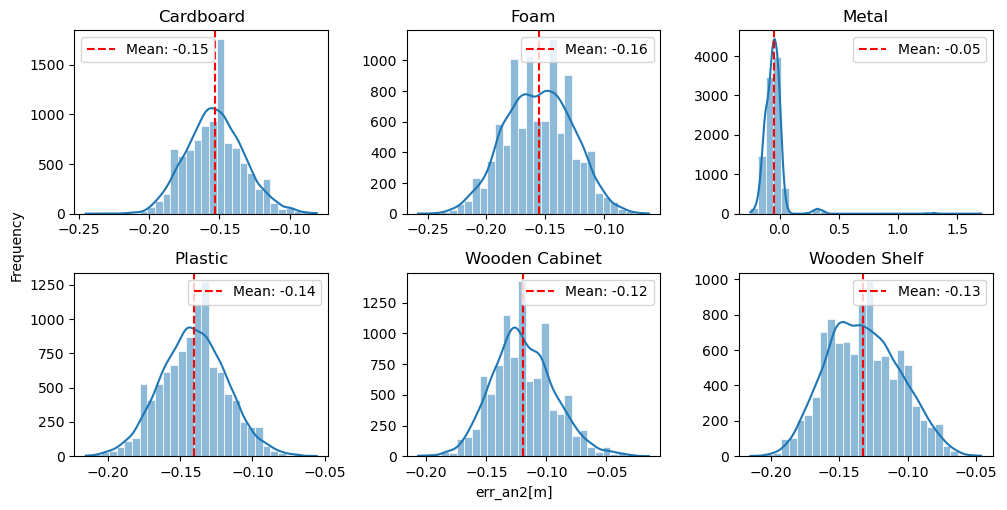

In [14]:
comparison_plot(col_name='err_an2', metric='[m]')